# Visualisation des donn√©es sur les incidents de s√©curit√© sur le r√©seau de la SCNF

In [1]:
############ Installation pr√©alable ##############
#!pip install pywaffle
#!pip install wordcloud

In [2]:
############ Importation des modules n√©cessaires ##############
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  #pour la gestion des dates
from pywaffle import Waffle
import wordcloud
from wordcloud import WordCloud
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('punkt')

########### Importation du jeu de donn√©es ############
incident= pd.read_csv('incident.csv')
incident.head()

id    origine numero_isic  \
0  18212  Mobilit√©s           0   
1  18152     R√©seau         NaN   
2  18196     R√©seau         NaN   
3  18203  Mobilit√©s       17347   
4  18379     R√©seau       17477   

                                          type_event        date  \
0  D√©passement de la vitesse limite de plus de 40...  2015-01-12   
1                                                RFC  2015-01-14   
2                                   D√©faillance voie  2015-01-19   
3  Franchissement intempestif d'un signal d'arr√™t...  2015-01-20   
4  Engagement intempestif d'un train sur une voie...  2015-02-04   

                                              nature region  \
0         D√©passement de vitesse sup√©rieur √† 40 km/h     RA   
1  Un TGV franchi le PN 25 barri√®res hautes, la s...    PCA   
2  D√©faut de g√©om√©trie n√©cessitant l'arr√™t des ci...     LR   
3  Le signal C348 est franchit ferm√© par le train...    CEN   
4  Engagement intempestif d'une circulation sur u...     RA   

                         lieu  niveau_gravite  annee  
0             Montbrison (42)             NaN   2015  
1                  Lunel (34)             NaN   2015  
2  Entre S√®te et Le Castellas             NaN   2015  
3                     Orl√©ans             NaN   2015  
4          Lyon Perrache (69)             NaN   2015

In [3]:
######## Retrait des donn√©es de 2015 ###########
incident2=incident.drop(incident[incident['annee']=="2015"].index, inplace=False)

## En moyenne, sur la p√©riode de 2016 √† 2022, quelles sont les r√©gions dans lesquelles les incidents sont les plus graves? 

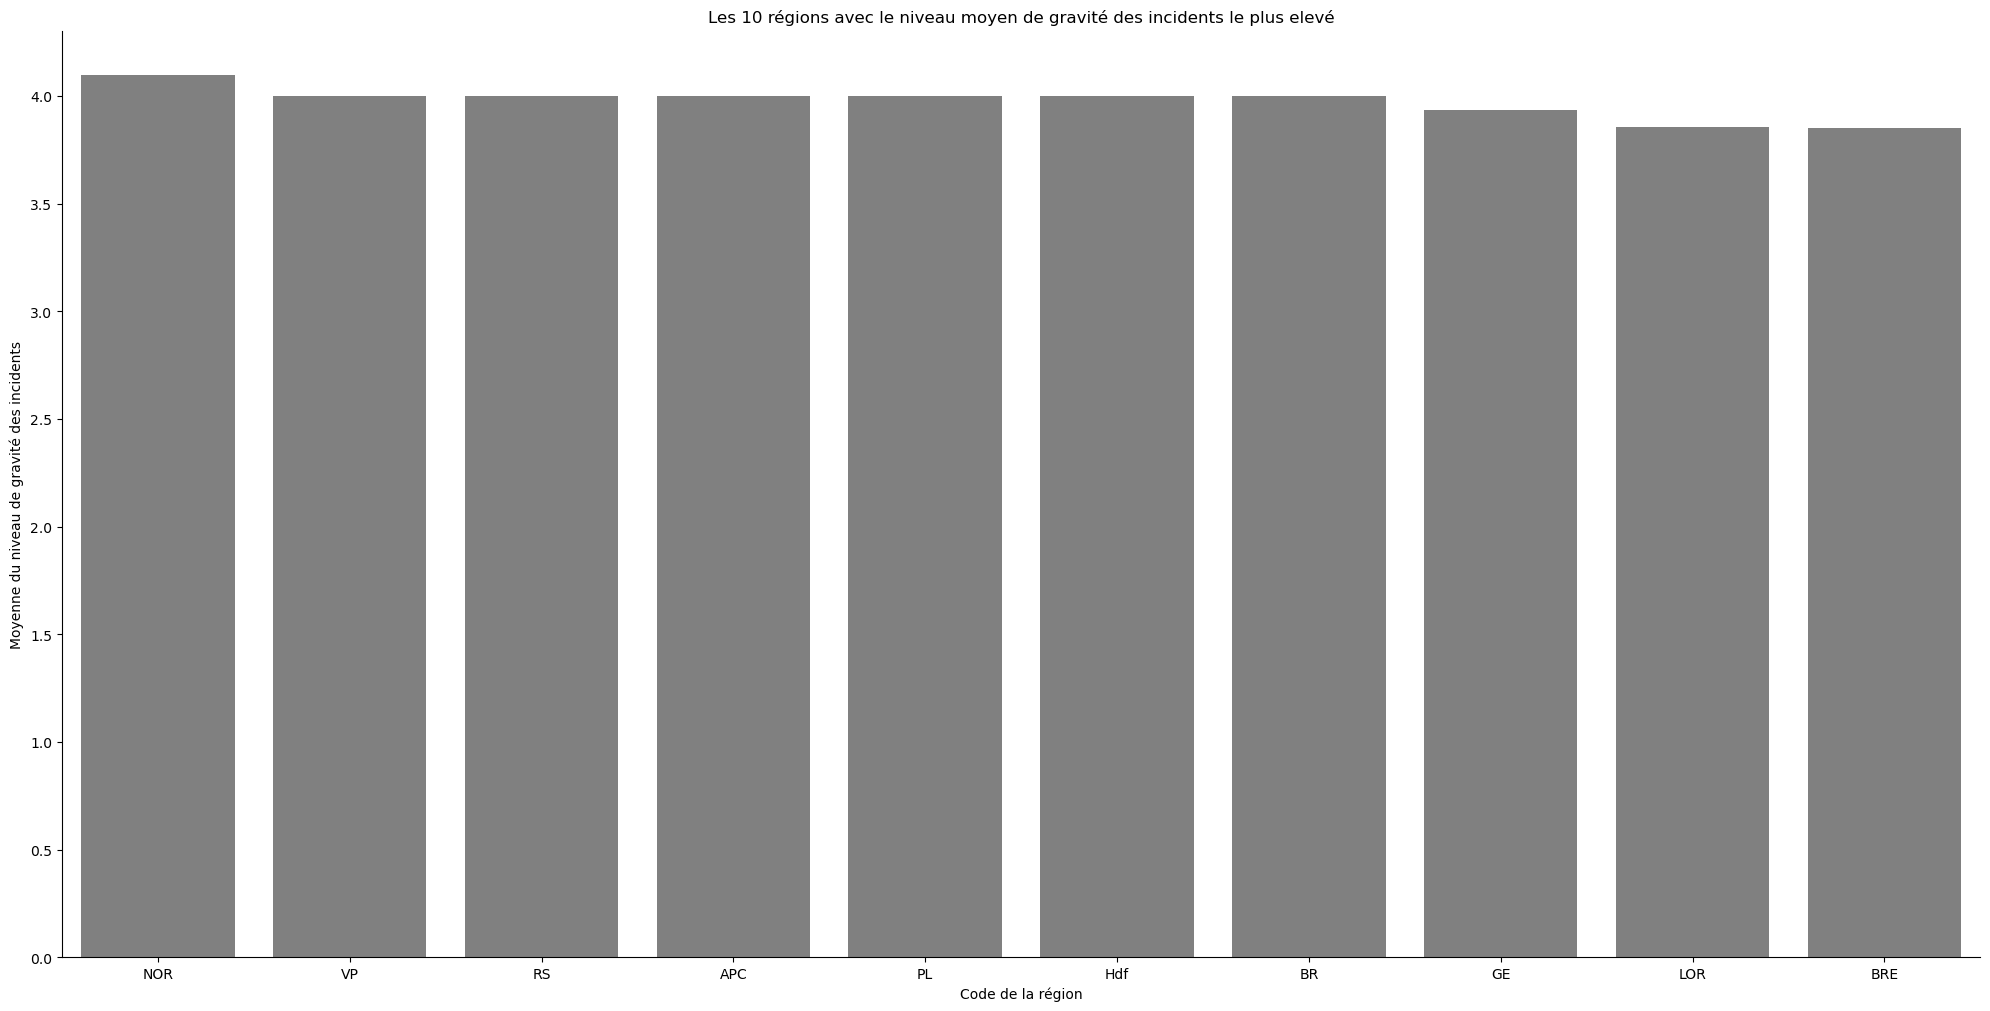

In [4]:
df1=incident2.groupby('region').agg({'niveau_gravite': "mean"}).sort_values('niveau_gravite', ascending = False).head(10)
df1=df1.reset_index()
#sns.set(style="darkgrid")
g = sns.catplot(x='region', y='niveau_gravite', data=df1, kind = "bar", height = 10, aspect = 2, color='gray')
g.set_axis_labels('Code de la r√©gion', 'Moyenne du niveau de gravit√© des incidents')
plt.title('Les 10 r√©gions avec le niveau moyen de gravit√© des incidents le plus elev√©')
plt.show()

## Comment sont r√©partis les incidents survenus par ann√©e?

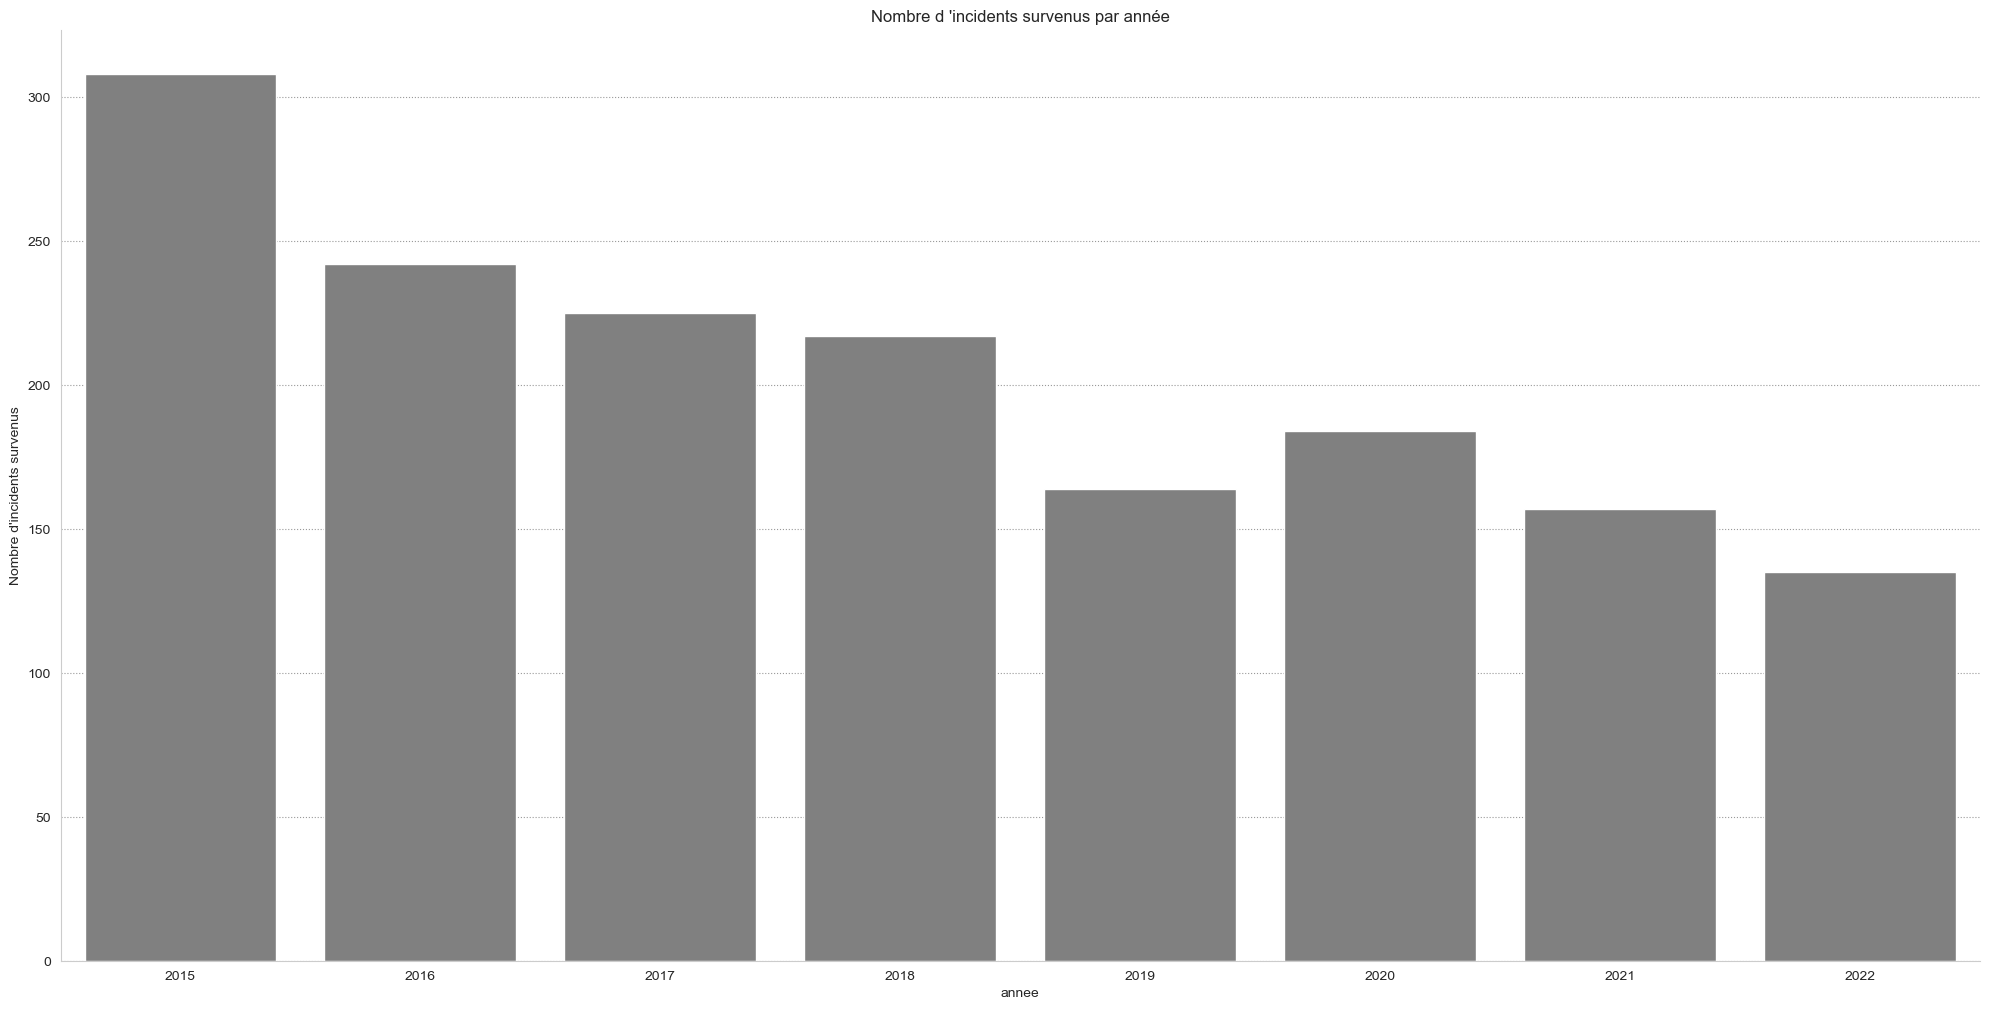

In [44]:
df2=incident.groupby('annee').agg({'annee': "count"})
df2.rename(columns = {'annee':'occurence'}, inplace = True)
df2=df2.reset_index()
g1 = sns.catplot(x='annee', y='occurence', data=df2, kind = "bar", height = 10, aspect = 2, color='gray')
g1.set_axis_labels('annee', 'Nombre d\'incidents survenus')
plt.title('Nombre d \'incidents survenus par ann√©e')
plt.show()

## Evolution du niveau de gravit√© moyen des incidents survenus depuis 2016

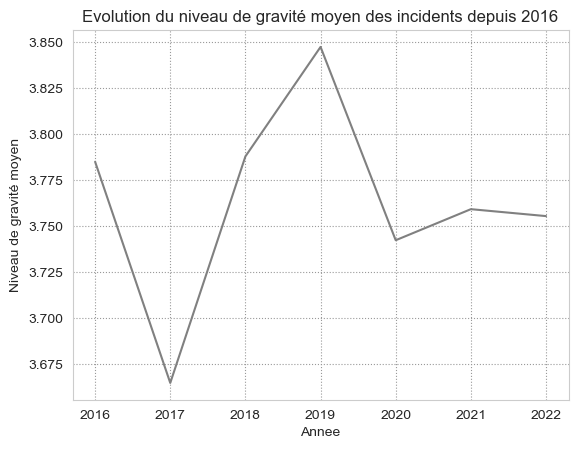

In [45]:
df3=incident2.groupby('annee').agg({'niveau_gravite': "mean"})
df3=df3.reset_index()
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(df3['annee'], df3['niveau_gravite'], "gray")
plt.title('Evolution du niveau de gravit√© moyen des incidents depuis 2016')
plt.xlabel('Annee')
plt.ylabel('Niveau de gravit√© moyen')
plt.show()

## Quels sont les types d'incidents qui surviennent le plus souvent?

In [46]:
df4=incident.groupby('type_event').agg({'type_event': "count"})
df4.rename(columns = {'type_event':'nb_occurence'}, inplace = True)
df4=df4.sort_values('nb_occurence', ascending = False).head(10)
df4

nb_occurence
type_event                                                      
Franchissement intempestif d'un signal d'arr√™t ...           183
D√©faillance voie                                             175
D√©passement de la vitesse limite de plus de 40 ...           155
Exp√©dition d'un train sans ordre √©crit  de rest...           130
Incident grave de signalisation                              124
RFC                                                           90
Portes ouvertes sur train de voyageurs en circu...            78
D√©raillement                                                  75
Incendie √† bord d‚Äôun train                                    64
Ouvrage en terre d√©terior√©                                    59

## Comment √©voluent les occurences de ces types d'incidents dans le temps?

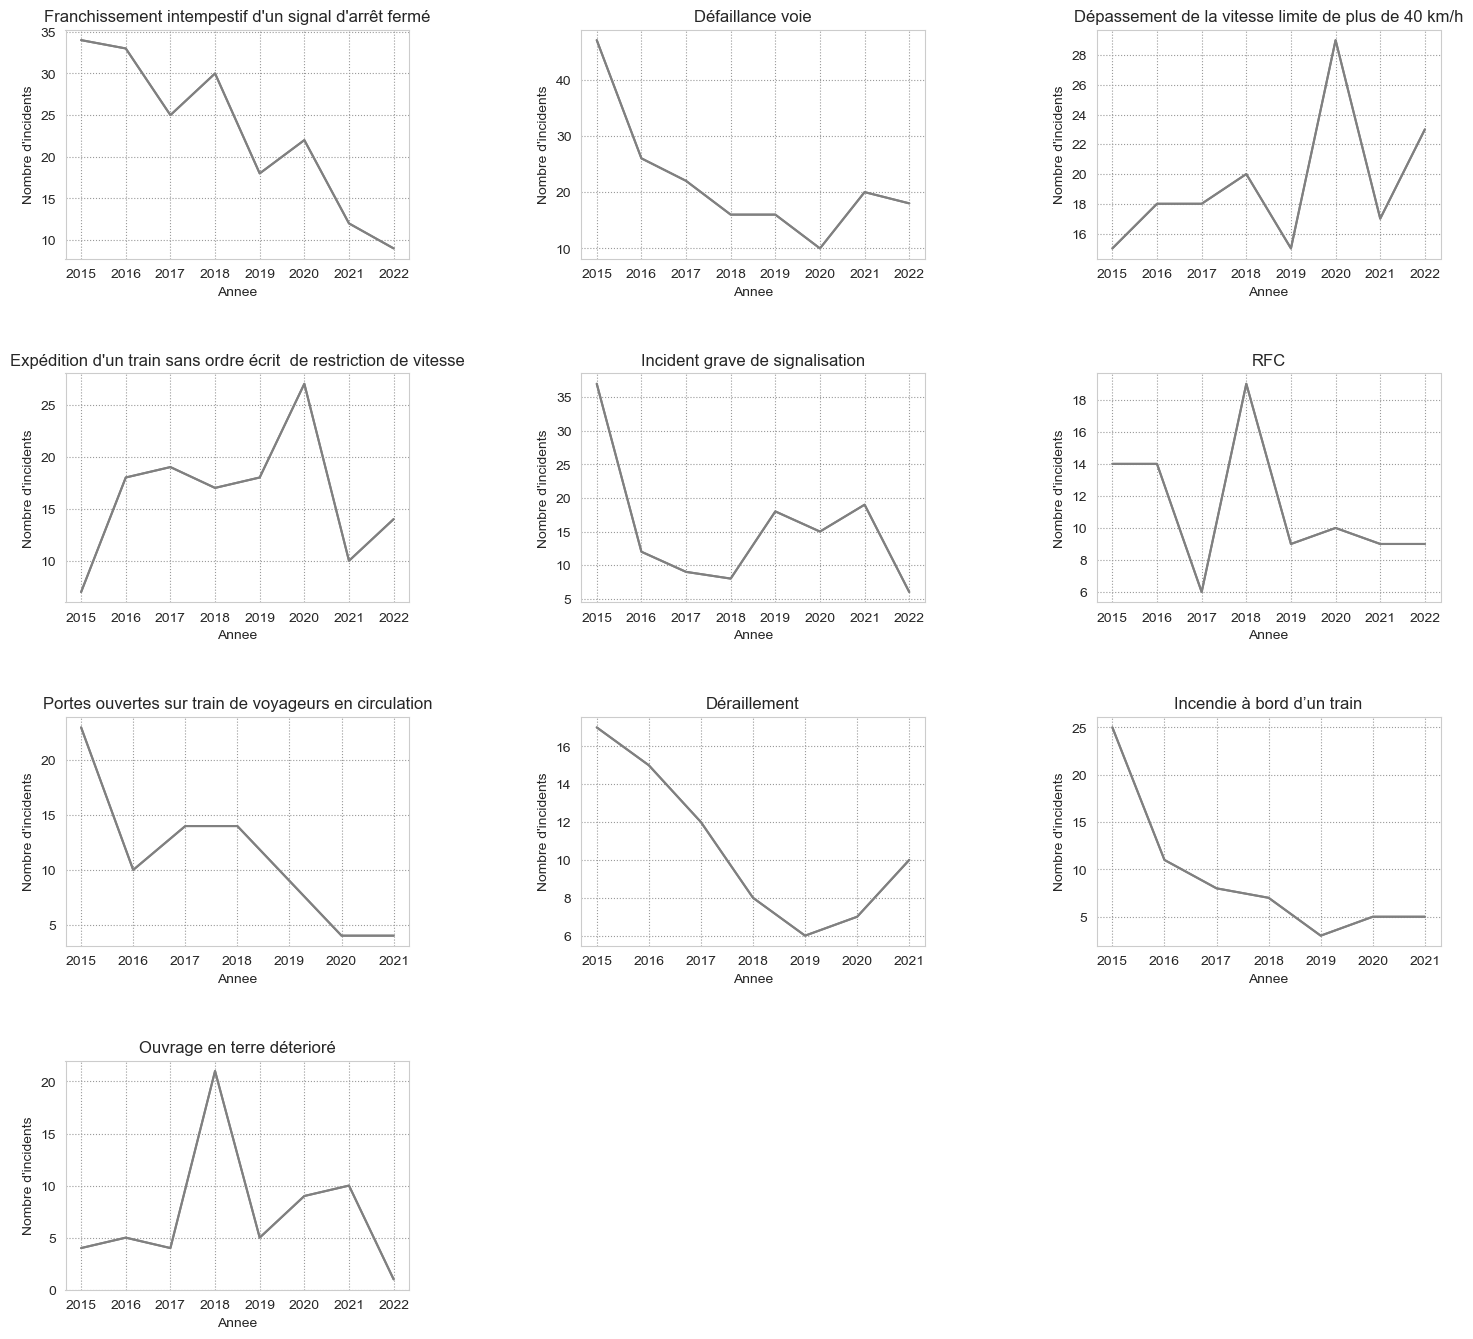

In [48]:
freq_event=np.array(df4.index)
plt.figure(1,figsize=(10,18))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,top = 0.9, wspace = 0.5, hspace = 0.5)
for i in range(len(freq_event)):
    plt.subplot(4,3,i+1)
    df=incident[incident['type_event']==freq_event[i]].groupby('annee').agg({'type_event':"count"})
    plt.plot(df.index, df['type_event'], "gray")
    plt.xlabel('Annee')
    plt.ylabel('Nombre d\'incidents')
    plt.title(freq_event[i])
plt.show()

## Mais quelles sont les origines de tous ces incidents de s√©curit√© survenus sur le r√©seau de la SNCF?ü§î

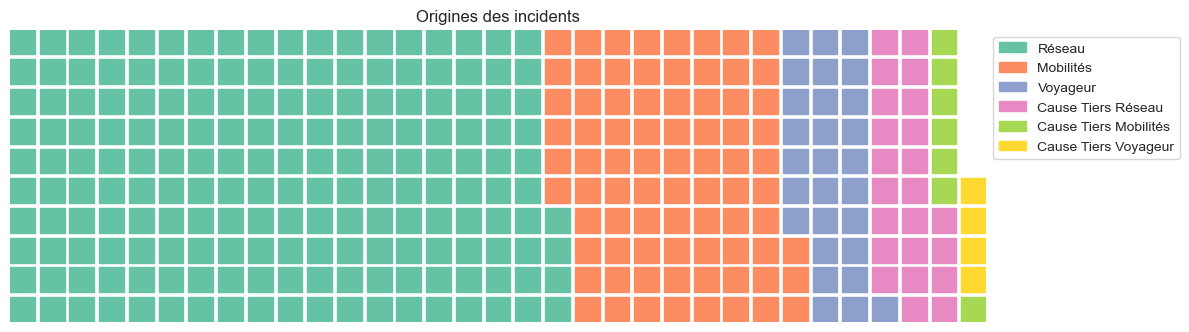

In [51]:
df=incident.groupby('origine').agg({'origine': "count"})
df.rename(columns = {'origine':'nb_occurence'}, inplace = True)
df=df.sort_values('nb_occurence', ascending = False)
df=df.head(6)
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(df.nb_occurence/5),
    labels=list(df.index),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (1,1)}
)
plt.title('Origines des incidents')
plt.show()

## R√©sum√© sur les diff√©rentes natures des incidents
Le nuage de mots cl√©s est une sorte de condens√© s√©mantique d'un texte dans lequel les concepts clefs √©voqu√©s sont dot√©s d'une unit√© de taille (dans le sens du poids de la typographie utilis√©e) permettant de faire ressortir leur importance dans le texte.

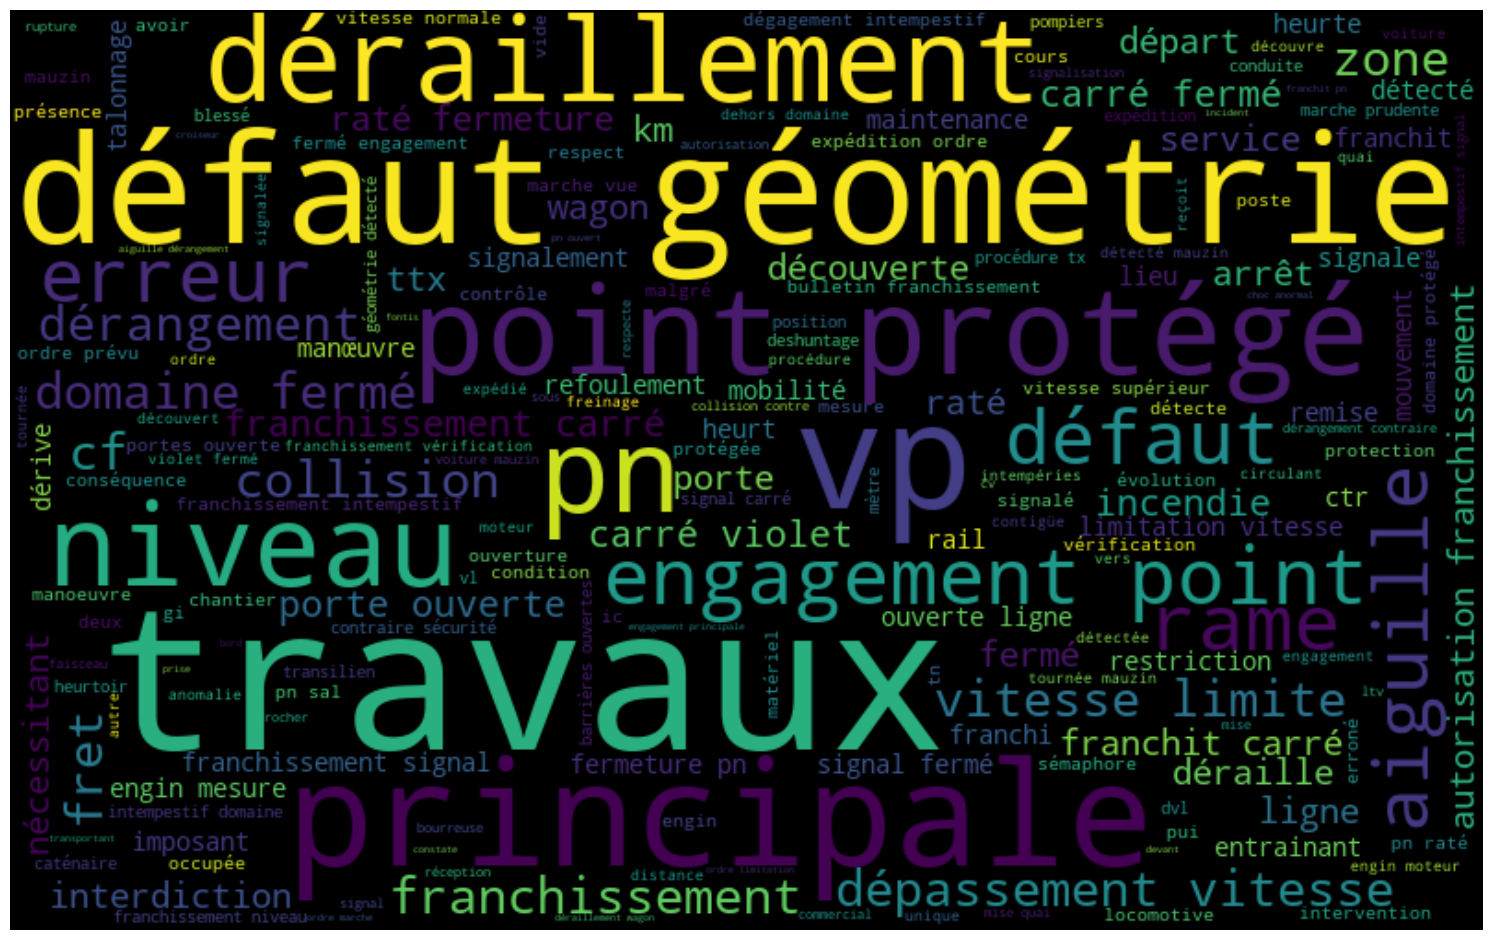

In [19]:
## Transformation de la variable nature en corpus de texte
texte = str([i for i in incident.nature]) 
texte = texte.lower() # mettre les mots en minuscule

#Tokenisation
words=nltk.word_tokenize(texte, language='french')

#Elimination des signes de ponctuation
words = [word for word in words if word.isalpha()]

#Retrait des stopwords
stop_words_contexte=["train", "trains", "sncf", "ter", "apr√®s", "alors", "sans", "tgv", "r√©seau", "gare", "voie", "lors", "suite",
"conducteur", "voyageur", "voyageurs", "circulation", "agent", "agents","passager", "passagers", "entre", "plusieurs", "entre",
"circulations", "passage", "non", "avant", "voies", "circule", "plus"]
stop_words = list(set(stopwords.words('french')))+stop_words_contexte
words = [w for w in words if not w in stop_words]

# Reconstitution du corpus apr√®s nettoyage
wc =' '.join(words)

# Wordcloud
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(wc)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
plt.show()

Avec ce nuage, on voit les id√©es cl√©s et donc importantes concernant les natures des diff√©rents incidents survenus sur le r√©seau de la SNCF.

## Lieux o√π surviennent le plus les incidents dans la r√©gion √Æle-de-france üí°

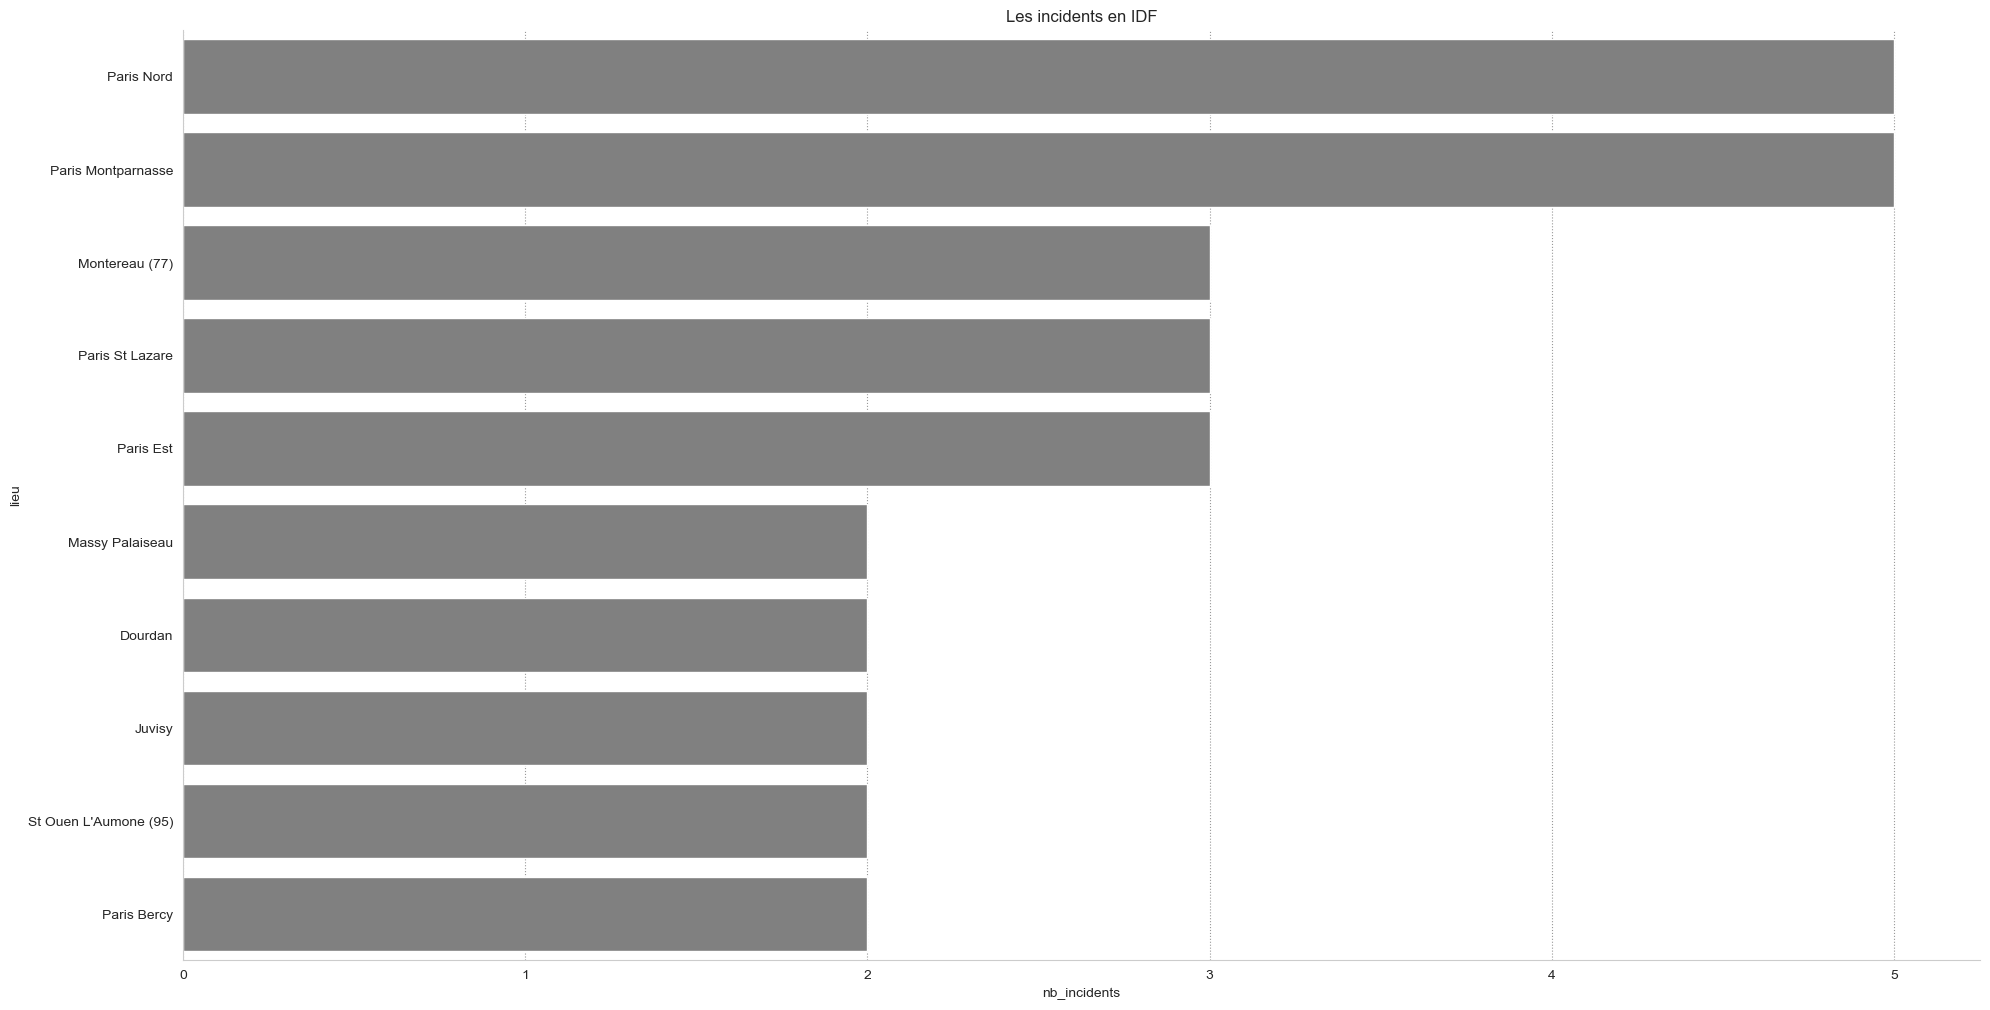

In [55]:
df4=incident[incident['region']=='IDF']
df4=df4.groupby('lieu').agg({'lieu': "count"})
df4.rename(columns = {'lieu':'nb_incidents'}, inplace = True)
df4=df4.sort_values('nb_incidents', ascending = False).head(10)
df4=df4.reset_index()
sns.catplot(x='nb_incidents', y='lieu', data=df4, kind = "bar", height = 10, aspect = 2, color='gray')
plt.title('Les incidents en IDF')
plt.show()